***
# **Libraries**
***
Import needed common libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use('bmh')
sns.set_style('whitegrid')
pd.set_option('display.float', '{:.2f}'.format)

***
# **Data Understanding**
***

## **Data Information:**
I have downloaded a fuel consumption dataset from Canada Open Data repository, [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

Its contains vehicle's fuel consumption ratings and carbon dioxide (CO2) emissions for retail sale in Canada. 

## **Understanding the table**	
01. **Year:** Vehicle's model year (2021)
02. **Make:** Vehicle's makes (i.e. brands)
03. **Model:** 4WD/4X4 = *Four-wheel drive*, AWD = *All-wheel drive*, FFV = *Flexible-fuel vehicle*, SWB = *Short wheelbase*, LWB = *Long wheelbase*, EWB = *Extended wheelbase*
04. **Class:** Vehicle's classes (i.e. SUV, Van, Pickup, Compact, etc)
05. **Transmission:** A = *automatic*, AM = *automated manual*, AS = *automatic with select shift*, AV = *continuously variable*, M = *manual*, 3 – 10 = *Number of gears*

06. **Fuel type:** X = *regular gasoline*, Z = *premium gasoline*, D = *diesel*, E = *ethanol (E85)*, N = *natural gas*

07. **Fuel consumption:** *City* and *highway* fuel consumption ratings are shown in litres per 100 kilometres (L/100 km), The combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

08. **CO2 emissions:** The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

09. **CO2 rating:** The tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

10. **Smog rating:** The tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

## **Load dataset:**  
## `MY2021 Fuel Consumption Ratings.csv`

In [67]:
df = pd.read_csv("../BD00-Datasets/csv-datasets/MY2021-FuelConsumptionRatings.csv")
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           917 non-null    int64  
 1   Make           917 non-null    object 
 2   Model          917 non-null    object 
 3   Class          917 non-null    object 
 4   Engine         917 non-null    float64
 5   Cylinders      917 non-null    int64  
 6   Transmission   917 non-null    object 
 7   Fuel           917 non-null    object 
 8   FC_City        917 non-null    float64
 9   FC_Highway     917 non-null    float64
 10  FC_Comb        917 non-null    float64
 11  FC_MPG         917 non-null    int64  
 12  CO2_Emissions  917 non-null    int64  
 13  CO2_Ratings    917 non-null    int64  
 14  Smog_Rating    917 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 107.6+ KB


***
# **Exploratory Data Analysys (EDA)**
***
### **Data Exploration**

In [68]:
print("The first 5 rows of the dataset:")
df.head()

The first 5 rows of the dataset:


,Year,Make,Model,Class,Engine,Cylinders,Transmission,Fuel,FC_City,FC_Highway,FC_Comb,FC_MPG,CO2_Emissions,CO2_Ratings,Smog_Rating
0,2021,Acura,ILX,Compact,2.40,4,AM8,Z,9.90,7.00,8.60,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.50,6,AM9,Z,11.10,10.80,11.00,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.00,4,AS10,Z,11.00,8.60,9.90,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.00,4,AS10,Z,11.30,9.10,10.30,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.00,4,AS10,Z,11.20,8.00,9.80,29,230,5,7


In [69]:
print("The count of each column\'s distinct values:")
df.nunique()

The count of each column's distinct values:


Year               1
Make              38
Model            690
Class             15
Engine            37
Cylinders          8
Transmission      23
Fuel               4
FC_City          145
FC_Highway       108
FC_Comb          129
FC_MPG            49
CO2_Emissions    235
CO2_Ratings       10
Smog_Rating        5
dtype: int64

In [70]:
print("Table's summary description:")
df.describe().T

Table's summary description:


,count,mean,std,min,25%,50%,75%,max
Year,917.00,2021.00,0.00,2021.00,2021.00,2021.00,2021.00,2021.00
Engine,917.00,3.20,1.39,1.00,2.00,3.00,4.00,8.00
Cylinders,917.00,5.69,1.98,3.00,4.00,6.00,8.00,16.00
FC_City,917.00,12.44,3.48,4.00,10.10,12.00,14.70,30.30
FC_Highway,917.00,9.26,2.20,3.90,7.70,9.00,10.70,20.90
FC_Comb,917.00,11.01,2.86,4.00,9.10,10.60,12.90,26.10
FC_MPG,917.00,27.47,7.74,11.00,22.00,27.00,31.00,71.00
CO2_Emissions,917.00,257.52,64.49,94.00,212.00,253.00,301.00,608.00
CO2_Ratings,917.00,4.38,1.64,1.00,3.00,4.00,5.00,10.00
Smog_Rating,917.00,4.71,1.72,1.00,3.00,5.00,6.00,7.00


In [71]:
print("The sum of missing values:")
df.isna().sum()

The sum of missing values:


Year             0
Make             0
Model            0
Class            0
Engine           0
Cylinders        0
Transmission     0
Fuel             0
FC_City          0
FC_Highway       0
FC_Comb          0
FC_MPG           0
CO2_Emissions    0
CO2_Ratings      0
Smog_Rating      0
dtype: int64

***
# **Data Preparation**
***
## **Outliers Analysis:** 
### Continuous features check

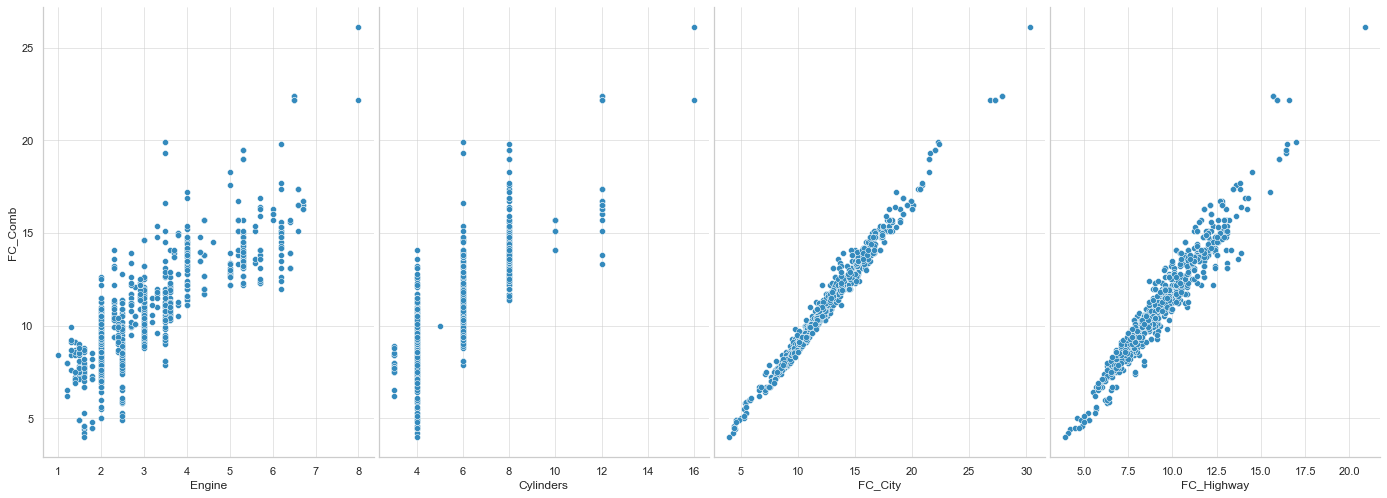

In [72]:
sns.pairplot(df, x_vars= ['Engine', 'Cylinders', 'FC_City', 'FC_Highway'], 
                 y_vars='FC_Comb', height=7, aspect=0.7, kind='scatter', diag_kind=None);
#sns.pairplot(df, kind='kde', height=1.5);

The skewness of vehicle's engine volume: 0.90168


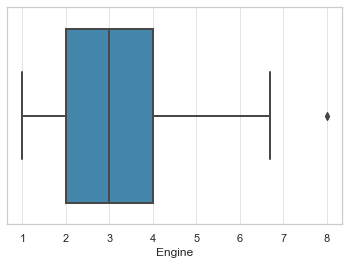

In [73]:
print(f"The skewness of vehicle's engine volume: {df['Engine'].skew():.5f}")
sns.boxplot(x='Engine', data=df);

The skewness of vehicle's cylinders amount: 1.15968


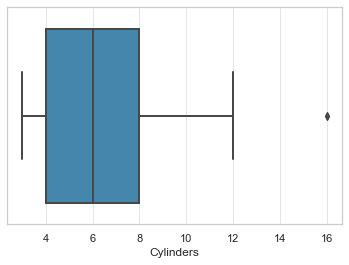

In [74]:
print(f"The skewness of vehicle's cylinders amount: {df['Cylinders'].skew():.5f}")
sns.boxplot(x='Cylinders', data=df);

The skewness of fuel consumption in city driving: 0.78434


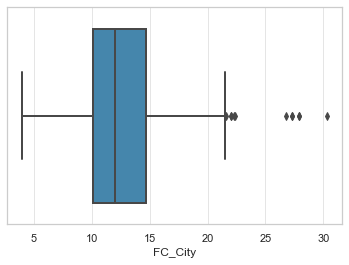

In [75]:
print(f"The skewness of fuel consumption in city driving: {df['FC_City'].skew():.5f}")
sns.boxplot(x='FC_City', data=df);

The skewness of fuel consumption in highway driving: 0.68804


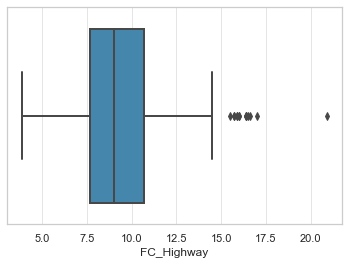

In [76]:
print(f"The skewness of fuel consumption in highway driving: {df['FC_Highway'].skew():.5f}")
sns.boxplot(x='FC_Highway', data=df);

### **Removing outliers**
***

In [77]:
cdf = ['Engine', 'Cylinders', 'FC_City', 'FC_Highway']

In [78]:
for i in cdf:
    print(f"Min & Max values of {i}:")
    q75, q25 = np.percentile(df.loc[:, i], [75, 25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(F"Min: {min:.5f}")
    print(f"Max: {max:.5f}\n{'-'*45}")
    
    df = df.drop(df[df.loc[:, i] < min].index)
    df = df.drop(df[df.loc[:, i] > max].index)

Min & Max values of Engine:
Min: -1.00000
Max: 7.00000
---------------------------------------------
Min & Max values of Cylinders:
Min: -2.00000
Max: 14.00000
---------------------------------------------
Min & Max values of FC_City:
Min: 3.20000
Max: 21.60000
---------------------------------------------
Min & Max values of FC_Highway:
Min: 3.35000
Max: 14.95000
---------------------------------------------


In [79]:
print("The updated first 5 rows of the dataset:")
df.describe().T

The updated first 5 rows of the dataset:


,count,mean,std,min,25%,50%,75%,max
Year,903.00,2021.00,0.00,2021.00,2021.00,2021.00,2021.00,2021.00
Engine,903.00,3.16,1.36,1.00,2.00,3.00,4.00,6.70
Cylinders,903.00,5.63,1.88,3.00,4.00,6.00,6.00,12.00
FC_City,903.00,12.26,3.15,4.00,10.10,12.00,14.45,21.50
FC_Highway,903.00,9.15,2.01,3.90,7.70,8.90,10.50,14.50
FC_Comb,903.00,10.86,2.59,4.00,9.00,10.60,12.70,18.30
FC_MPG,903.00,27.68,7.61,15.00,22.00,27.00,31.00,71.00
CO2_Emissions,903.00,254.87,60.05,94.00,211.00,252.00,298.50,413.00
CO2_Ratings,903.00,4.42,1.62,1.00,3.00,4.00,5.00,10.00
Smog_Rating,903.00,4.76,1.69,1.00,3.00,5.00,6.00,7.00


## **Correlation analysis**
***

Correlations between continuous features:
-------------------------------------------------------
            Engine  Cylinders  FC_City  FC_Highway
Engine        1.00       0.92     0.84        0.75
Cylinders     0.92       1.00     0.84        0.74
FC_City       0.84       0.84     1.00        0.92
FC_Highway    0.75       0.74     0.92        1.00
-------------------------------------------------------


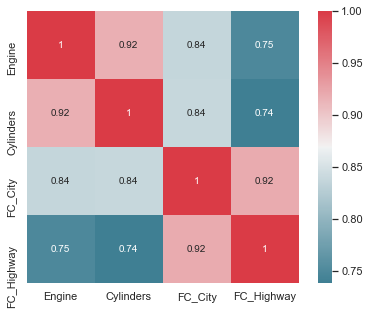

In [80]:
df_corr = df.loc[:, cdf]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

print(f"Correlations between continuous features:\n{'-'*55}\n{corr}\n{'-'*55}")

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True);

### **Dropping unneeded columns**
***

In [81]:
df = df.drop(['Year', 'Make', 'Model', 'FC_MPG', 'CO2_Emissions', 'CO2_Ratings', 'Smog_Rating'], axis=1)

print("The first 5 rows of the reduced dataset:")
df.head()

The first 5 rows of the reduced dataset:


,Class,Engine,Cylinders,Transmission,Fuel,FC_City,FC_Highway,FC_Comb
0,Compact,2.40,4,AM8,Z,9.90,7.00,8.60
1,Two-seater,3.50,6,AM9,Z,11.10,10.80,11.00
2,SUV: Small,2.00,4,AS10,Z,11.00,8.60,9.90
3,SUV: Small,2.00,4,AS10,Z,11.30,9.10,10.30
4,Compact,2.00,4,AS10,Z,11.20,8.00,9.80



## **Categorical features check**
***

In [82]:
# Helper procedure for displaying bar plot
def b_plot(data=None, col=None):
    df_count = data[col].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=df_count.index, y=df_count.values, alpha=.9)
    if (col=='Class' or col=='Make'):
        label = f"Vehicle {col}"
    elif (col=='Fuel' or col=='Model'):
        label = f"{col} Type"
    else: label = col
    
    plt.title(f"Frequency Distribution of {label}")
    plt.ylabel("Number of Occurrences", fontsize=12)
    plt.xlabel(label, fontsize=12)
    plt.show()

b_plot(df, 'Make')

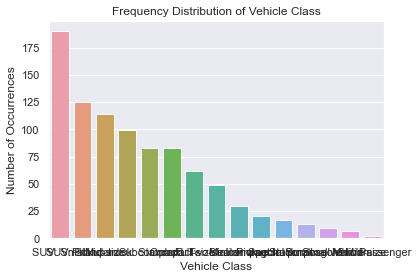

In [83]:
b_plot(df, 'Class')

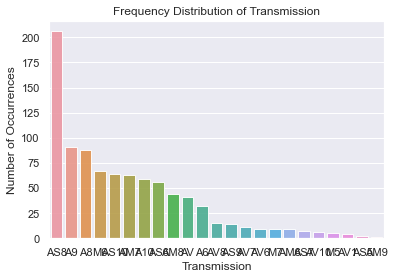

In [84]:
b_plot(df, 'Transmission')

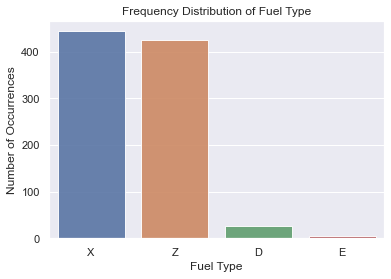

In [85]:
b_plot(df, 'Fuel')

***
### **Analysis of Variance (ANOVA)** of categorical features with linearOLS model
***

In [86]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols as olsm

# Fit categorical features using ordinary least squares model 
# to minimizes the sum of the squared residuals
#olsm_fit = olsm('CO2_Emissions ~ C(Make) + C(Class) + C(Transmission) + C(Fuel)', data = df).fit()
olsm_fit = olsm('FC_Comb ~ C(Class) + C(Transmission) + C(Fuel)', data = df).fit()
anova = sm.stats.anova_lm(olsm_fit, typ=2)
#print(f"{sm.stats.anova_lm(ols_fit, typ=2)}\n\n{ols_fit.summary()}")
print(f"ANOVA result of models total variation, degree of freedom,\n" +
      f"and F-Stats & P-value significance:\n{'-'*60}\n{anova}\n{'-'*60}")


ANOVA result of models total variation, degree of freedom,
and F-Stats & P-value significance:
------------------------------------------------------------
                 sum_sq     df     F  PR(>F)
C(Class)         685.13  14.00 16.39    0.00
C(Transmission)  729.66  22.00 11.11    0.00
C(Fuel)          603.42   3.00 67.37    0.00
Residual        2576.44 863.00   nan     nan
------------------------------------------------------------


## **Rebuilt final dataframe**
***
#### **Encoding categorical features**

In [87]:
cat_df= df.select_dtypes(include=['object']).copy()

print(f"Categorical features shape: {cat_df.shape}")

Categorical features shape: (903, 3)


In [88]:
from sklearn.preprocessing import LabelBinarizer

# Helper function for encoding categorical variabels
def lb_results(data=None):
    lb = LabelBinarizer()
    lb_fit = lb.fit_transform(data)
    lb_result = pd.DataFrame(lb_fit, columns=lb.classes_)
    return lb_result

lb_make = lb_results(cat_df['Make'])

print(f"Encoded vehicle's makes features dimension: {lb_make.shape}")
lb_make.head()

In [89]:
lb_class = lb_results(cat_df['Class'])

print(f"Encoded vehicle's class features dimension: {lb_class.shape}")
lb_class.head()

Encoded vehicle's class features dimension: (903, 15)


,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater,Van: Passenger
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
lb_trans = lb_results(cat_df['Transmission'])

print(f"Encoded vehicle's transmission features dimension: {lb_trans.shape}")
lb_trans.head()

Encoded vehicle's transmission features dimension: (903, 23)


,A10,A6,A8,A9,AM6,AM7,AM8,AM9,AS10,AS5,...,AS9,AV,AV1,AV10,AV6,AV7,AV8,M5,M6,M7
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
lb_fuel = lb_results(cat_df['Fuel'])

print(f"Encoded vehicle's fuel type features dimension: {lb_fuel.shape}")
lb_fuel.head()

Encoded vehicle's fuel type features dimension: (903, 4)


,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


### **Final dataframe**
***

In [92]:
# Get the continous variabels
cont_df = df[['Engine', 'Cylinders', 'FC_City', 'FC_Highway', 'FC_Comb']]

# Combining encoded categorical variabels dataframe
#encoded_df = pd.concat([lb_make, lb_class, lb_trans, lb_fuel], axis=1)
encoded_df = pd.concat([lb_class, lb_trans, lb_fuel], axis=1)

print(f"Continuous features shape          : {cont_df.shape}")
print(f"Encoded categorical features shape : {encoded_df.shape}")

Continuous features shape          : (903, 5)
Encoded categorical features shape : (903, 42)


In [93]:
# Built final dataframe from combination of continous and categorical variabels dataframes
final_df = pd.concat([cont_df, encoded_df], axis=1)

print(f"Raw final dataframe shape : {final_df.shape}")
# Missing values checks
print("And missing values checks :")
final_df.isna().sum()

Raw final dataframe shape : (917, 47)
And missing values checks :


Engine                     14
Cylinders                  14
FC_City                    14
FC_Highway                 14
FC_Comb                    14
Compact                    14
Full-size                  14
Mid-size                   14
Minicompact                14
Minivan                    14
Pickup truck: Small        14
Pickup truck: Standard     14
SUV: Small                 14
SUV: Standard              14
Special purpose vehicle    14
Station wagon: Mid-size    14
Station wagon: Small       14
Subcompact                 14
Two-seater                 14
Van: Passenger             14
A10                        14
A6                         14
A8                         14
A9                         14
AM6                        14
AM7                        14
AM8                        14
AM9                        14
AS10                       14
AS5                        14
AS6                        14
AS7                        14
AS8                        14
AS9       

In [94]:
# Removing missing values since its only an insignificant numbers
final_df = final_df.dropna()

print(f"Final dataframe dimension : {final_df.shape}\nAnd lookup first 5 rows   :")
final_df.head()

Final dataframe dimension : (889, 47)
And lookup first 5 rows   :


,Engine,Cylinders,FC_City,FC_Highway,FC_Comb,Compact,Full-size,Mid-size,Minicompact,Minivan,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
0,2.40,4.00,9.90,7.00,8.60,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,3.50,6.00,11.10,10.80,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,2.00,4.00,11.00,8.60,9.90,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,2.00,4.00,11.30,9.10,10.30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,2.00,4.00,11.20,8.00,9.80,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


### **Continuous feature scaling**
***

In [127]:
cnames = ['Engine','Cylinders', 'FC_City', 'FC_Highway']
for i in cnames:
    #print(i)
    final_df[i] = (final_df[i] - final_df[i].mean())/final_df[i].std()

print("Final dataframe first 5 rows:")
final_df.tail()

Final dataframe first 5 rows:


,Engine,Cylinders,FC_City,FC_Highway,FC_Comb,Compact,Full-size,Mid-size,Minicompact,Minivan,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
898,-1.31,-0.88,-1.38,-1.67,6.90,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
899,-0.87,-0.88,-0.81,-1.17,8.40,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
900,-0.87,-0.88,-0.81,-1.07,8.50,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
901,-0.87,-0.88,-0.78,-1.27,8.30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
902,-0.87,-0.88,-0.59,-0.53,9.40,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


***
# **Data Modeling**
***
### **Feature Selection**

In [96]:
X = final_df.drop(['FC_Comb'], axis=1)
y = final_df['FC_Comb']

print(f"X features shape : {X.shape}")
print(f"y target shape   : {y.shape}")

X features shape : (889, 46)
y target shape   : (889,)


### **Divides dataframe into train and test**
***

In [102]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.2 , random_state=42)

print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\n{'-'*25}\n"+
      f"X_valid shape: {X_true.shape}\ny_valid shape: {y_true.shape}")

X_train shape: (711, 46)
y_train shape: (711,)
-------------------------
X_valid shape: (178, 46)
y_valid shape: (178,)


***
# **Multilinear Regression**
***

In [103]:
from sklearn.linear_model import LinearRegression
#from statsmodels.regression.linear_model import OLS

#ols = OLS(endog=y_train, exog=X_train)
#res = ols.fit()

#print(res.summary())

mlr = LinearRegression()
lr_fit = mlr.fit(X_train, y_train)

accu = lr_fit.score(X_true, y_true)
intc = lr_fit.intercept_
coef = lr_fit.coef_

print(f"Accuracy   : {accu:.5f}\nIntercept  : {intc:.5f}\nCoefficient:")
coef

Accuracy   : 0.99968
Intercept  : 49933303089.82623
Coefficient:


array([-4.95048171e-03,  5.55328587e-05,  1.74754338e+00,  9.08818602e-01,
       -2.22603283e+10, -2.22603283e+10, -2.22603283e+10, -2.22603283e+10,
       -2.22603283e+10, -2.22603283e+10, -2.22603283e+10, -2.22603283e+10,
       -2.22603283e+10, -2.22603283e+10, -2.22603283e+10, -2.22603283e+10,
       -2.22603283e+10, -2.22603283e+10, -2.22603283e+10, -1.36057049e+10,
       -1.36057049e+10, -1.36057049e+10, -1.36057049e+10, -1.36057049e+10,
       -1.36057049e+10, -1.36057049e+10, -1.36057049e+10, -1.36057049e+10,
       -1.36057049e+10, -1.36057049e+10, -1.36057049e+10, -1.36057049e+10,
       -1.36057049e+10, -1.36057049e+10, -1.36057049e+10, -1.36057049e+10,
       -1.36057049e+10, -1.36057049e+10, -1.36057049e+10, -1.36057049e+10,
       -1.36057049e+10, -1.36057049e+10, -1.40672700e+10, -1.40672700e+10,
       -1.40672700e+10, -1.40672700e+10])

In [106]:
df_coef = pd.DataFrame(coef, X_true.columns, columns=['Coefficient'])

print("Coefficient of each features:")
df_coef.T

Coefficient of each features:


,Engine,Cylinders,FC_City,FC_Highway,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,...,AV6,AV7,AV8,M5,M6,M7,D,E,X,Z
Coefficient,-0.00,0.00,1.75,0.91,-22260328256.21,-22260328256.22,-22260328256.21,-22260328256.22,-22260328256.23,-22260328256.24,...,-13605704854.30,-13605704854.24,-13605704854.25,-13605704854.26,-13605704854.25,-13605704854.24,-14067269968.48,-14067269968.49,-14067269968.49,-14067269968.49


***
# **Prediction**
***

In [107]:
# Making predictions using the model

#y_pred = ols_fit.predict(X_valid)
#df_pred = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})

#print("Prediction results:")
#df_pred.T

y_pred = lr_fit.predict(X_true)
df_pred = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})

print("Prediction results:")
df_pred.T

Prediction results:


,284,442,39,425,596,817,348,848,592,548,...,368,97,202,582,864,440,820,25,84,10
Actual,10.00,4.20,14.10,9.60,8.80,16.70,9.50,9.40,8.30,9.50,...,13.80,12.00,15.70,13.20,8.40,7.80,16.30,9.20,9.80,9.60
Predicted,10.07,4.20,14.06,9.54,8.84,16.63,9.50,9.36,8.32,9.47,...,13.82,12.06,15.72,13.21,8.46,7.85,16.30,9.17,9.77,9.67


***
# **Evaluation**
***

In [108]:
# Calculating error terms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#mae = mean_absolute_error(y_valid, y_pred)
#mse = mean_squared_error(y_valid, y_pred)
#rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
#r_squared = ols_fit.rsquared
#adj_r_squared = ols_fit.rsquared_adj

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)
adj_r_squared = 1 - ((1 - r_squared)*(len(y_true) - 1) / (len(y_true) - X_true.shape[1] - 1))

# Adjusted R2 = 1 – [(1-RSquared)*(n-1)/(n-k-1)]
# n: The number of observations, k: The number of predictor variables

************************************************
            Mean Absolute Error : 0.03070
             Mean Squared Error : 0.00192
        Root Mean Squared Error : 0.04378
------------------------------------------------
                R-Squared Score : 0.99968
       Adjusted R-Squared Score : 0.99957
************************************************


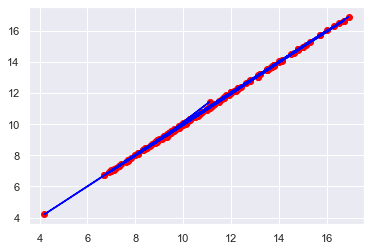

In [109]:
print(f"{'*'*48}\n"+
      f"{' '*12}Mean Absolute Error : {mae:.5f}\n"+  
      f"{' '*13}Mean Squared Error : {mse:.5f}\n"+  
      f"{' '*8}Root Mean Squared Error : {rmse:.5f}\n"+
      f"{'-'*48}\n"+
      f"{' '*16}R-Squared Score : {r_squared:.5f}\n"+
      f"{' '*7}Adjusted R-Squared Score : {adj_r_squared:.5f}\n"+
      f"{'*'*48}")

# Plot outputs
plt.scatter(y_true, y_pred,  color='red')
plt.plot(y_true, y_pred, color='blue')

plt.show()